# Rice Seed Decison Tree Classification

In this notebook, a dataset with two different kinds of rice seed is used to train a prediction model with a decison tree.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Loading and Visualizing the Data](#2)
- [ 3 - Features and Labels](#3)
- [ 4 - Decision Tree](#4)
- [ 5 - Results](#5)

<a name="1"></a>
## 1 - Packages 

Below are all the needed packages for this notebook.
- [numpy](https://www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
- [matplotlib](https://matplotlib.org) is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [seaborn](https://seaborn.pydata.org/index.html#) is a Python data visualization library based on matplotlib
- [scikit-learn](https://scikit-learn.org/stable/) is a library of simple and efficient tools for predictive data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<a name="2"></a>
## 2 - Loading and Visualizing the Data

The dataset containst two different kinds of rice seed, with variables describing the seed's figure and dimensions.

The dataset can be found here: [Rice Seed](https://www.kaggle.com/datasets/seymasa/rice-dataset-gonenjasmine)

In [2]:
#Load Data
data = pd.read_csv("./Data/Rice-Gonen andJasmine.csv")

In [3]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


In [4]:
#Drop unecessary column
data = data.drop(['id'], axis=1)

In [5]:
print(f"Data shape: {data.shape}")

Data shape: (18185, 11)


In [6]:
#Get classes
data['Class'].unique

<bound method Series.unique of 0        jasmine
1        jasmine
2        jasmine
3        jasmine
4        jasmine
          ...   
18180      Gonen
18181      Gonen
18182      Gonen
18183      Gonen
18184      Gonen
Name: Class, Length: 18185, dtype: object>

With our classes known, let's change them to integer values.

In [7]:
#Convert labels to integers
classes = {'jasmine': 0, 'Gonen': 1}
data['Class'] = data['Class'].map(classes)

In [8]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,0
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,0
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,0
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,0
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,0


To see how our variables relate, let's create a correlation map.

<AxesSubplot:>

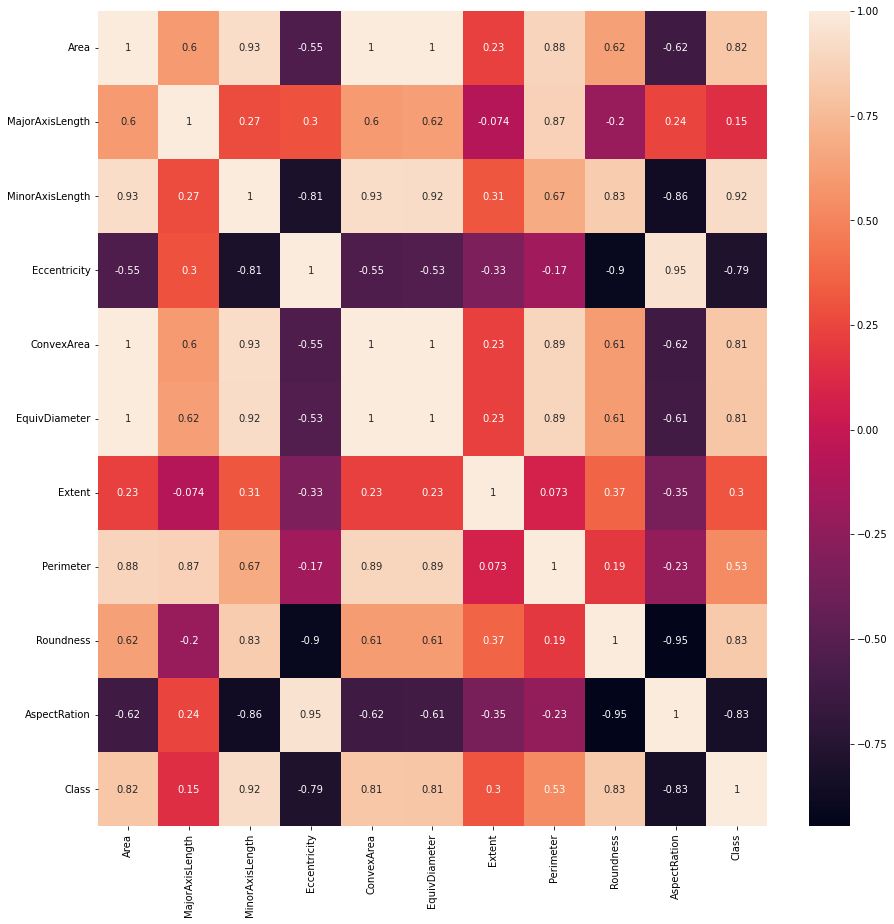

In [9]:
#Get correlation map
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linewidths=0, ax=ax)

Looking at the map, we can see that area, convex area, and equivalent diameter have a perfect postive correlation. Minor Axis length also has a high correlation with these features, but has a higher correlation with the class label than they have. Let's keep minor axis length and discard these other featues as they are redundant.

<a name="3"></a>
## 3 - Features and Labels

Let's drop the unecessary features and split the data.

In [10]:
#Get features and labels
x = data.drop(['Area', 'ConvexArea', 'EquivDiameter', 'Class'], axis=1).to_numpy()
y = data.Class.to_numpy()

In [11]:
#Split data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)

<a name="4"></a>
## 4 - Decision Tree

Now we can create and train the tree.

In [12]:
#Create tree
model = tree.DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier()

In [13]:
#Get predictions for test data
y_pred = model.predict(test_x)

In [14]:
#Get scores
print(f"Model score: {model.score(train_x,train_y)}")
print(f"Model test score: {model.score(test_x,test_y)}")
print(f"Model mean squared error: {mean_squared_error(y_pred, test_y)}")

Model score: 1.0
Model test score: 1.0
Model mean squared error: 0.0


<a name="5"></a>
## 5 - Results

Above we can see the scores and the mean squared error of the tree. It achieved a perfect score for both training and test data. We have a perfect model.